<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) # add color channel
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_train, x_test = x_train/255.0, x_test/255.0
label_train, label_test = to_categorical(y_train), to_categorical(y_test) # one-hot encoding

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


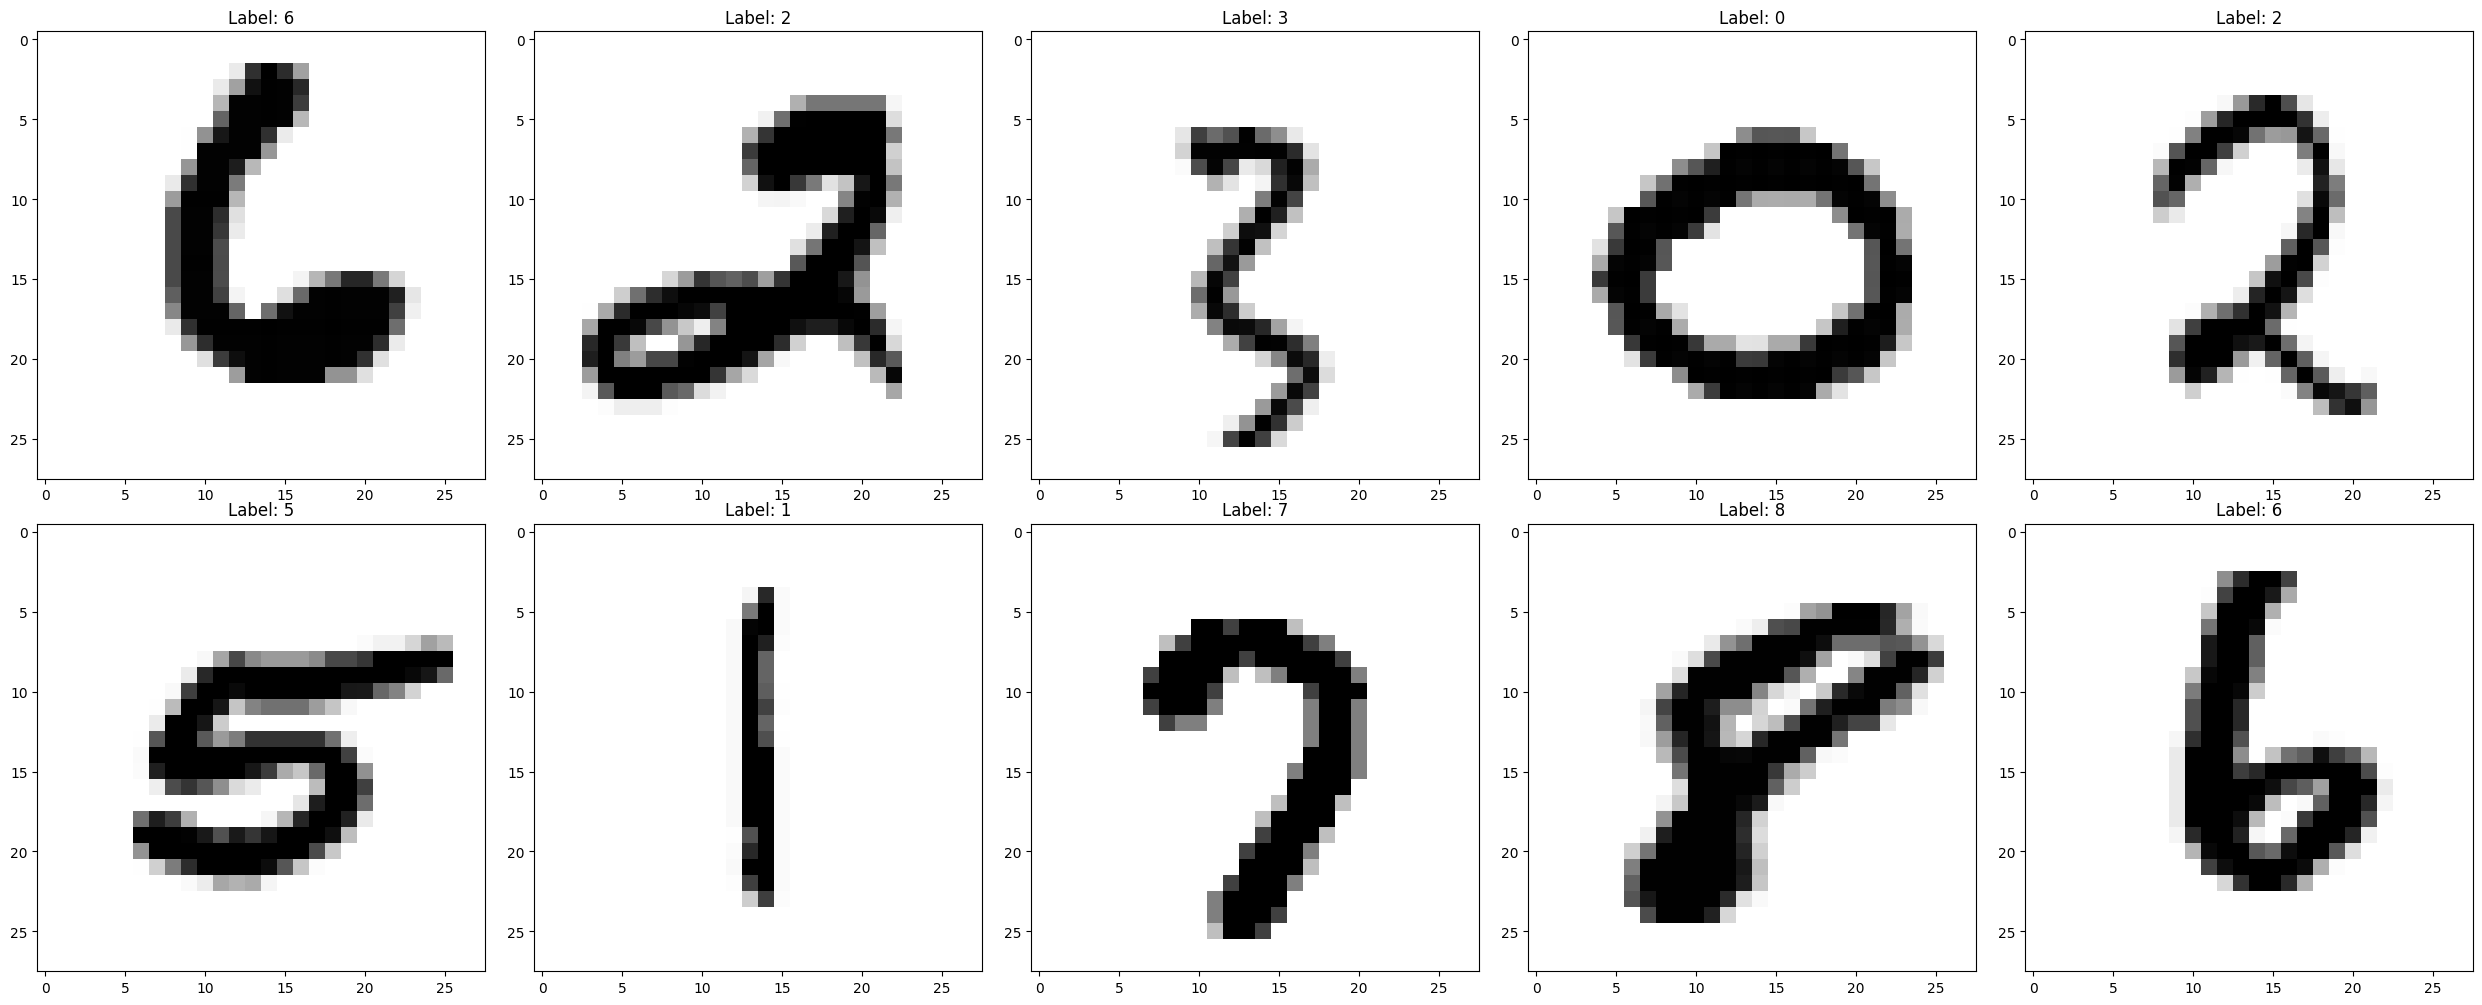

In [3]:
num_row, num_col = 2, 5

idx = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,)) # subset 10 figures
x_train10, y_train10 = x_train[idx], y_train[idx]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(25, 10))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train10[i])))
    ax.imshow(x_train10[i], cmap=cm.binary)

plt.tight_layout()
plt.show()

In [4]:
mnist_cnn = models.Sequential()
mnist_cnn.add(Conv2D(filters = 7, kernel_size = (4,4),padding = 'Same', activation ='relu', input_shape = (28,28,1))) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(4,4))) # pooling
mnist_cnn.add(Conv2D(filters = 14, kernel_size = (4,4),padding = 'Same', activation ='relu')) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(4,4), strides=(2,2)))
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(256, activation = "relu"))
mnist_cnn.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compile model
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
# train model
y_pred = mnist_cnn.fit(x_train, label_train, epochs = 10, batch_size = 250, validation_data=(x_test, label_test))

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.1624 - loss: 2.2887 - val_accuracy: 0.4300 - val_loss: 2.1841
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.4602 - loss: 2.0592 - val_accuracy: 0.6110 - val_loss: 1.3866
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - accuracy: 0.6807 - loss: 1.1799 - val_accuracy: 0.7747 - val_loss: 0.7519
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.8024 - loss: 0.6717 - val_accuracy: 0.8427 - val_loss: 0.5021
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.8550 - loss: 0.4826 - val_accuracy: 0.8825 - val_loss: 0.3927
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.8782 - loss: 0.3903 - val_accuracy: 0.8997 - val_loss: 0.3297
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.8998 - loss: 0.3268 - val_accuracy: 0.9129 - val_loss: 0.2913
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.9083 - loss: 0.2943 -

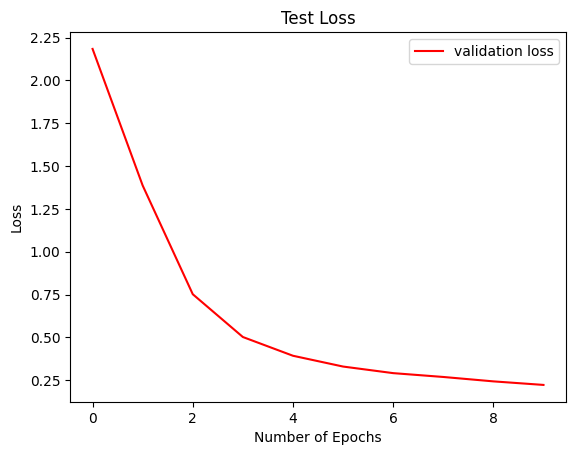

In [6]:
plt.plot(y_pred.history['val_loss'], color='r', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


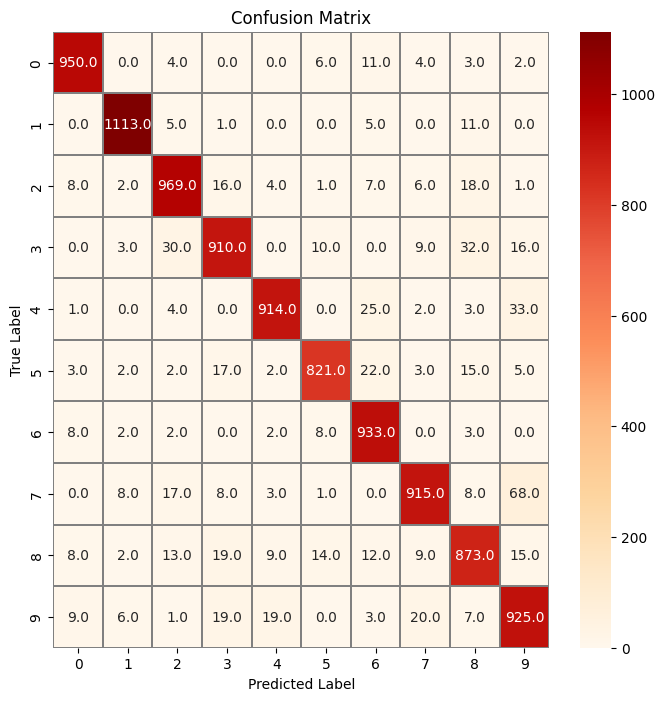

In [7]:
Y_pred = mnist_cnn.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(label_test,axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [10]:
!pip install gudhi
import gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.0 MB/s eta 0:00:00
